# Real-world Data Wrangling

In [1]:
#Install dependencies & import libraries
!python -m pip install kaggle==1.6.12

Defaulting to user installation because normal site-packages is not writeable


In [2]:
!pip install --target=/workspace ucimlrepo numpy==1.24.3

  Using cached ucimlrepo-0.0.7-py3-none-any.whl (8.0 kB)
  Using cached numpy-1.24.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.3 MB)
  Using cached pandas-2.2.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.1 MB)
  Using cached certifi-2025.4.26-py3-none-any.whl (159 kB)
  Using cached python_dateutil-2.9.0.post0-py2.py3-none-any.whl (229 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl (509 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl (347 kB)
  Using cached six-1.17.0-py2.py3-none-any.whl (11 kB)


## 1. Gather data

In this section, you will extract data using two different data gathering methods and combine the data. Use at least two different types of data-gathering methods.

### **1.1.** Problem Statement
Investigate which Country has the Highest and the Lowest Population, as well as we'll look at the populations' impact on Air Quality. I hypothesize that the larger the population, the worse the Air Quality.

### **1.2.** Gather at least two datasets using two different data gathering methods

Datasets chosen:

**Dataset 1:** World Population by Countries Dataset (1960-2021)
(https://www.kaggle.com/datasets/kaggleashwin/population-dataset)

**Dataset 2:** Most Polluted Cities and Countries (IQAir Index)
(https://www.kaggle.com/datasets/ramjasmaurya/most-polluted-cities-and-countries-iqair-index)

Datasets both are Country based and can be analyzed together.

#### **Dataset 1**

Type: *CSV File*

Method: *The data was gathered via **Kaggle API** as a ZIP file.* 

Dataset variables:

*   *Country Name*
*   *Country Code*
*   *Year* Between 1960 to 2021

In [3]:
#Download Population data from Kaggle API - 1st data gathering

!~/.local/bin/kaggle datasets download -d kaggleashwin/population-dataset -p ./data --unzip

Dataset URL: https://www.kaggle.com/datasets/kaggleashwin/population-dataset
License(s): CC0-1.0
  0%|                                               | 0.00/68.7k [00:00<?, ?B/s]
100%|██████████████████████████████████████| 68.7k/68.7k [00:00<00:00, 80.7MB/s]


In [4]:
#Load 1st data file

import pandas as pd

usecols = ["Country Name", "2018", "2019", "2020", "2021"]
pop_df = pd.read_csv("./data/World-population-by-countries-dataset.csv", usecols=usecols)

#### Dataset 2

Type: *CSV File*

Method: *The data was gathered via **manual download** method from Kaggle then uploaded manually to the data folder.*

Dataset variables:

*   *Country/Region*
*   *Year* Between 2018 to 2021

In [5]:
#Load 2nd data file

air_df = pd.read_csv("./data/AIR-QUALITY-INDEX-top-countries.csv", index_col="Rank")

## 2. Assess data

I visually assessed each part of the dataset in Microsoft Excel as well as programmatically assessing them below and documented all the issues I detected while scrolling and randomly checking the data, these issues include columns with predominantly missing values, non-descriptive columns names and inconsistency in column entries.

In [6]:
# import all libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Inspect Tables:

First we will gather basic information about the datasets to look for missing data, duplicates, or incorrect data types.

#### Population Dataset 1

In [7]:
# Inspecting the dataframes visually

# 1st - display first five rows of data
pop_df.head(5)

,Country Name,2018,2019,2020,2021
0,Aruba,105846.0,106310.0,106766.0,107195.0
1,Africa Eastern and Southern,643090131.0,660046272.0,677243299.0,694665117.0
2,Afghanistan,37171922.0,38041757.0,38928341.0,39835428.0
3,Africa Western and Central,435229381.0,446911598.0,458803476.0,470898870.0
4,Angola,30809787.0,31825299.0,32866268.0,33933611.0


**Tidiness & Quality Issues present:** There are rows with Regional Names and Total Population sums that need to be cleaned up. If left in, it will affect the mean, and give inaccurate quantitative information.

In [8]:
# 1st - Inspecting the dataframe programmatically
pop_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Name  266 non-null    object 
 1   2018          264 non-null    float64
 2   2019          264 non-null    float64
 3   2020          264 non-null    float64
 4   2021          264 non-null    float64
dtypes: float64(4), object(1)
memory usage: 10.5+ KB


**Tidiness & Quality Issues present:** 

Missing Data - There are columns with 264 and 266 rows of values - this discrepancy and the missing data needs to be cleaned up.

Incorrect Data Types - All of the data in the year columns should be integers not floats.

In [9]:
# 1st - Check for duplicated rows
pop_df.duplicated().sum()

0

In [10]:
pop_df.describe()

,2018,2019,2020,2021
count,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02
mean,3.103591e+08,3.140425e+08,3.176734e+08,3.210893e+08
std,9.683483e+08,9.788967e+08,9.891628e+08,9.988295e+08
min,1.067800e+04,1.076400e+04,1.083400e+04,1.087300e+04
25%,1.740174e+06,1.751950e+06,1.767996e+06,1.791783e+06
50%,1.045548e+07,1.047907e+07,1.052565e+07,1.054019e+07
75%,6.193141e+07,6.150589e+07,6.157091e+07,6.295547e+07
max,7.602716e+09,7.683806e+09,7.763933e+09,7.836631e+09


-- The population for years 2018 to 2021 will have to be displayed in Billions. 

-- Check the upper ends of the population to make sure it's accurate, that it's not reading an aggregate.

#### Air Quality Dataset 2

In [11]:
# 2nd - display first five rows of data
air_df.head(5)

,Country/Region,2021,2020,2019,2018,Population
Rank,,,,,,
1,Bangladesh,76.9,77.1,83.3,97.1,"164,689,383"
2,Chad,75.9,-,-,-,"16,425,859"
3,Pakistan,66.8,59,65.8,74.3,"220,892,331"
4,Tajikistan,59.4,30.9,-,-,"9,537,642"
5,India,58.1,51.9,58.1,72.5,"1,380,004,385"


**Tidiness & Quality Issues present:** Will need to set 'Rank' to the index column. Already it's evident there are rows with missing data.

In [12]:
# 2nd - Inspecting the dataframe programmatically
air_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 118 entries, 1 to 118
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country/Region  118 non-null    object 
 1   2021            118 non-null    float64
 2   2020            118 non-null    object 
 3   2019            118 non-null    object 
 4   2018            118 non-null    object 
 5   Population      118 non-null    object 
dtypes: float64(1), object(5)
memory usage: 6.5+ KB


**Tidiness & Quality Issues present:** The Air Quality data should be all Floats, not object and float. This will need tidying.

In [13]:
air_df.describe()

,2021
count,118.000000
mean,21.027119
std,15.023336
min,3.800000
25%,10.725000
50%,16.750000
75%,25.900000
max,76.900000


In [14]:
# 2nd - Check for duplicated rows
air_df.duplicated().sum()

0

No duplicates found. There are 118 countries present in Air Quality dataset versus 264 countries in the Population dataset. Will need to investigate further.

### Dataset 1 World Population by Countries: Tidiness & Quality Issues

**Quality Issue 1: Incorrect Data Types** Population values for the years should be Integers. Air Index values should be Floats. 

Method used: *Programmatical*

**Quality Issue 2: Missing or Incomple Data** Missing values in some year columns, blank or non-numeric entries.

Method used: *Programmatical*

**Quality Issue 3: Inconsistent granularity** It mixes individual countries with (Aruba) with regions (Middle East). This is inflating the country count to 264.

Method used: *Programmatical & Visual verification*

**Tidiness Issue 1: Duplication of data** Population dataset has Country Code and Country Name, both identify the same entity. Will drop the Country Code.

Method used: *Programmatical*

**Tidiness Issue 2: Table Structure** This is in wide format, each year is it's own column. For analysis it's better to pivot to long,  with columns [Country Name, Year] 

Method used: *Programmatical*

### Dataset 2 Air Quality Index by Countries: Tidiness & Quality Issues

**Quality Issue 1: Incorrect Mixed Data Types** The year columns 2018 - 2021, are mixed data types, strings where '-' appears and numbers elsewhere.

Method used: *Programmatical*

**Quality Issue 2: Fake Nulls** Missing values are encoded as '-' in the year columns rather than as true nulls.

Method used: *Programmatical*

**Tidiness Issue 1:** This is in wide format, each year is it's own column. A 'tidy' form would have one row per Country-Year with columns [Country, Year, AQI]

Method used: *Programmatical*

**Tidiness Issue 2:** The 'Rank' column is redundant once you sort by AQI, it doesn't add new information.

Method used: *Programmatical*

## 3. Clean data
Clean the data to solve the issues corresponding to data quality and tidiness found in the assessing step. **Make sure you include justifications for your cleaning decisions.**

In [15]:
# Make copies of the datasets to ensure the raw dataframes 
# are not impacted

pop_dirty = pop_df.copy()
air_dirty = air_df.copy()

### Population dataset - Quality Issues 1 & 2
### Air Quality dataset - Quality Issue 1 & 2

We need to address the missing or incomplete data before we can address the incorrect data types and fake nulls

#### Population Dataset:

In [16]:
# Drop Null rows before changing data types

# Fill the null values with zero.
pop_dirty.fillna(0, inplace = True)

# verify no remaining null values
pop_dirty.isnull().sum()

Country Name    0
2018            0
2019            0
2020            0
2021            0
dtype: int64

In [17]:
# Drop rows with zero values

pop_dirty['2018'] = pop_dirty['2018'].replace(0, np.NaN)
pop_dirty['2019'] = pop_dirty['2019'].replace(0, np.NaN)
pop_dirty['2020'] = pop_dirty['2020'].replace(0, np.NaN)
pop_dirty['2021'] = pop_dirty['2021'].replace(0, np.NaN)

pop_dirty.dropna(inplace =True)

In [18]:
# Population dataset: Fix incorrect data types

pop_dirty['2018'] = pop_dirty['2018'].astype(int)
pop_dirty['2019'] = pop_dirty['2019'].astype(int)
pop_dirty['2020'] = pop_dirty['2020'].astype(int)
pop_dirty['2021'] = pop_dirty['2021'].astype(int)

In [19]:
pop_dirty.info()

<class 'pandas.core.frame.DataFrame'>
Index: 264 entries, 0 to 265
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Country Name  264 non-null    object
 1   2018          264 non-null    int64 
 2   2019          264 non-null    int64 
 3   2020          264 non-null    int64 
 4   2021          264 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 12.4+ KB


We've cleared the null values and also changed the datatypes for 2018, 2019, 2020, 2021. We're not concerned with 1960 - 2017 because we will be dropping those columns and not using that data in our comparison.

#### Air Quality Dataset:

In [20]:
# Change '-' value in row data to the rows numerical mean and change to float

aqi_columns = ['2021', '2020', '2019', '2018']
air_dirty[aqi_columns] = air_dirty[aqi_columns].replace('-', np.nan).astype(float)
air_dirty[aqi_columns] = air_dirty[aqi_columns].T.fillna(air_dirty[aqi_columns].mean(axis=1)).T

In [21]:
# verify that mean has replaced - 
air_dirty.head(5)

,Country/Region,2021,2020,2019,2018,Population
Rank,,,,,,
1,Bangladesh,76.9,77.1,83.30,97.10,"164,689,383"
2,Chad,75.9,75.9,75.90,75.90,"16,425,859"
3,Pakistan,66.8,59.0,65.80,74.30,"220,892,331"
4,Tajikistan,59.4,30.9,45.15,45.15,"9,537,642"
5,India,58.1,51.9,58.10,72.50,"1,380,004,385"


In [22]:
# Air Quality dataset: Fix incorrect data types - change to Float

air_dirty['2018'] = air_dirty['2018'].astype(float)
air_dirty['2019'] = air_dirty['2019'].astype(float)
air_dirty['2020'] = air_dirty['2020'].astype(float)
air_dirty['2021'] = air_dirty['2021'].astype(float)

In [23]:
air_dirty.info()

<class 'pandas.core.frame.DataFrame'>
Index: 118 entries, 1 to 118
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country/Region  118 non-null    object 
 1   2021            118 non-null    float64
 2   2020            118 non-null    float64
 3   2019            118 non-null    float64
 4   2018            118 non-null    float64
 5   Population      118 non-null    object 
dtypes: float64(4), object(2)
memory usage: 10.5+ KB


We've cleared the '-' values and also changed the datatypes for 2018, 2019, 2020, 2021 to floats. We're not concerned with Population because we will be dropping that column and not using that data in our comparison.

### Population dataset - Quality Issue 3 & Tidiness Issues 1. Tidiness Issue 2 is fixed when Plotting the graph.
### Air Quality dataset - Tidiness Issue 1 & 2

Population dataset will be trimmed to just the range of years that we have Air Quality data. Air Quality dataset will trim the Population data as it's a repeat from the Population dataset. Table Structure, Population dataset has Country/Regions mixed into the column when it should only be Countries.

#### Population Dataset:

In [24]:
#Population Dataset: Drop the column(s) of specific years and Country Code column
 
    # Dropped when database was loaded - see code at the beginning
    
    #   usecols = ["Country Name", "2018", "2019", "2020", "2021"]
    #   pop_df = pd.read_csv("./data/World-population-by-countries-dataset.csv", usecols=usecols)

Dropped the Country Code column on load as it was duplicated data. Manually cleaned the Regions from the Country column fixing the data granularity issue.

In [25]:
# Remove rows where 'Country Name' has more than 23 characters 
# 23 characters was visually inspected as being the max length of a Country name

pop_df.drop(pop_df[pop_df['Country Name'].str.len() > 23].index, inplace=True)

In [26]:
# Print rows where 'Country Name' has more than 23 characters

print(pop_df[pop_df['Country Name'].str.len() > 23])

Empty DataFrame
Columns: [Country Name, 2018, 2019, 2020, 2021]
Index: []


In [27]:
pop_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 236 entries, 0 to 265
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Name  236 non-null    object 
 1   2018          234 non-null    float64
 2   2019          234 non-null    float64
 3   2020          234 non-null    float64
 4   2021          234 non-null    float64
dtypes: float64(4), object(1)
memory usage: 11.1+ KB


In [28]:
# Remove rows where 'Country Name' contains the word 'income'
pop_df.drop(pop_df[pop_df['Country Name'].str.contains('income', case=False)].index, inplace=True)

In [29]:
# Remove rows where 'Country Name' contains the word 'World'
pop_df.drop(pop_df[pop_df['Country Name'].str.contains('World', case=False)].index, inplace=True)

In [30]:
# Remove rows where 'Country Name' contains the word 'Central'
pop_df.drop(pop_df[pop_df['Country Name'].str.contains('Central', case=False)].index, inplace=True)

In [31]:
# Remove rows where 'Country Name' contains the word 'dividend'
pop_df.drop(pop_df[pop_df['Country Name'].str.contains('dividend', case=False)].index, inplace=True)

In [32]:
# Remove rows where 'Country Name' contains the word 'IDA'
pop_df.drop(pop_df[pop_df['Country Name'].str.contains('IDA', case=False)].index, inplace=True)

In [33]:
# Remove rows where 'Country Name' contains the word 'IBRD'
pop_df.drop(pop_df[pop_df['Country Name'].str.contains('IBRD', case=False)].index, inplace=True)

In [34]:
# Remove rows where 'Country Name' contains the word 'Not'
pop_df.drop(pop_df[pop_df['Country Name'].str.contains('Not', case=False)].index, inplace=True)

In [35]:
# Remove rows where 'Country Name' contains the word 'developed'
pop_df.drop(pop_df[pop_df['Country Name'].str.contains('developed', case=False)].index, inplace=True)

In [36]:
# Remove rows where 'Country Name' contains the word 'Latin America'
pop_df.drop(pop_df[pop_df['Country Name'].str.contains('Latin America', case=False)].index, inplace=True)

In [37]:
# Remove rows where 'Country Name' contains the word 'Middle'
pop_df.drop(pop_df[pop_df['Country Name'].str.contains('Middle', case=False)].index, inplace=True)

In [38]:
# Remove rows where 'Country Name' contains the word 'Africa'
pop_df.drop(pop_df[pop_df['Country Name'].str.contains('Africa', case=False)].index, inplace=True)

After visually inspecting the spreadsheet: Removed all rows that were over 23 characters in length - these were the Region names that didn't belong in the Country column. Will verify this visually as well. Removed rows with "income", "World", "Central", "dividend", "IDA", "IBRD", "Not", "developed", "Latin America", "Middle", "Africa"

In [39]:
pop_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 217 entries, 0 to 265
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Name  217 non-null    object 
 1   2018          216 non-null    float64
 2   2019          216 non-null    float64
 3   2020          216 non-null    float64
 4   2021          216 non-null    float64
dtypes: float64(4), object(1)
memory usage: 10.2+ KB


In total, we cleaned out 48 rows of Regional population data that would affect our calculations.

#### Air Quality Dataset:

In [40]:
#Air Quality Dataset: Drop the Rank column
 
    # Dropped when database was loaded - Rank column was made to be the index column - see code at the beginning

    #   air_df = pd.read_csv("./data/AIR-QUALITY-INDEX-top-countries.csv", index_col="Rank")

In [41]:
#Air Quality Dataset: Drop the column(s) Population that's found on another Dataframe

air_dirty.drop(air_dirty.columns[[5]], axis=1, inplace=True)

In [42]:
air_dirty.info()

<class 'pandas.core.frame.DataFrame'>
Index: 118 entries, 1 to 118
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country/Region  118 non-null    object 
 1   2021            118 non-null    float64
 2   2020            118 non-null    float64
 3   2019            118 non-null    float64
 4   2018            118 non-null    float64
dtypes: float64(4), object(1)
memory usage: 9.6+ KB


## 4. Update your data store
Update your local database/data store with the cleaned data, following best practices for storing your cleaned data:

- Must maintain different instances / versions of data (raw and cleaned data)
- Must name the dataset files informatively
- Ensure both the raw and cleaned data is saved to your database/data store

In [43]:
pop_dirty.to_csv('population_clean_master.csv', index=False)

In [44]:
air_dirty.to_csv('air_quality_clean_master.csv', index=False)

## 5. Answer the research question

### **5.1:** Define and answer the research question 
Going back to the problem statement in step 1, use the cleaned data to answer the question you raised. Produce **at least** two visualizations using the cleaned data and explain how they help you answer the question.

*Research question 1:* Investigate which Country has the Highest and the Lowest Population

*Research question 2:* What, if any, impact does Population have on Air Quality? 

I hypothesize that the larger the population, the worse the Air Quality.

In [45]:
# Load clean datasets

df_pop = pd.read_csv('population_clean_master.csv')
df_air = pd.read_csv('air_quality_clean_master.csv')

#### Which Countries have the Highest Population - find the Top 10

In [46]:
# Convert year columns to numeric  
for year in ['2018','2019','2020','2021']:  
    df_pop[year] = pd.to_numeric(df_pop[year], errors='coerce')

In [47]:
# Country with max and min population in 2021  
highest = df_pop.loc[df_pop['2021'].idxmax()]
lowest  = df_pop.loc[df_pop['2021'].idxmin()] 
  
print('Highest in 2021:')
print(highest.to_frame().T)
  
print('Lowest in 2021:')
print(lowest.to_frame().T)

Highest in 2021:
   Country Name        2018        2019        2020        2021
35        China  1402760000  1407745000  1411100000  1412360000
Lowest in 2021:
    Country Name   2018   2019   2020   2021
147        Nauru  10678  10764  10834  10873


                          2018        2019        2020        2021
Country Name                                                      
China               1402760000  1407745000  1411100000  1412360000
India               1352642283  1366417756  1380004385  1393409033
Euro area            341979171   342283354   342708355   342566541
United States        326838199   328329953   331501080   331893745
Indonesia            267670549   270625567   273523621   276361788
Pakistan             212228288   216565317   220892331   225199929
Brazil               209469320   211049519   212559409   213993441
Nigeria              195874685   200963603   206139587   211400704
Bangladesh           161376713   163046173   164689383   166303494
Russian Federation   144477859   144406261   144073139   143446060


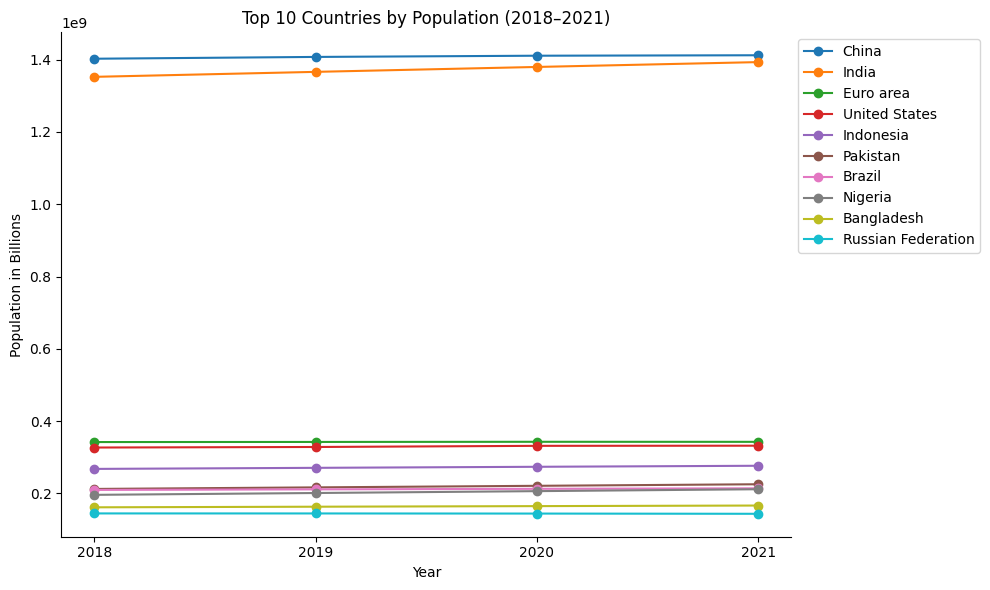

In [48]:
# Pick top 10 by 2021 and set Country Name as index  
top10 = df_pop.nlargest(10, '2021').set_index('Country Name')  

# Display their populations 2018–2021  
print(top10)

# Prepare integer x-axis years  
years = [2018, 2019, 2020, 2021]  
  
plt.figure(figsize=(10,6))  
for country in top10.index:  
    pops = top10.loc[country, ['2018','2019','2020','2021']].values  
    plt.plot(years, pops, marker='o', label=country)  
  
plt.title('Top 10 Countries by Population (2018–2021)')  
plt.xlabel('Year')  
plt.ylabel('Population in Billions')  
plt.xticks(years)  
plt.legend(loc='upper left', bbox_to_anchor=(1,1))  
sns.despine()  
plt.tight_layout()  
plt.show()

#### Which Countries have the Lowest Population - find the Lowest 10

                           2018   2019   2020   2021
Country Name                                        
Nauru                     10678  10764  10834  10873
Tuvalu                    11505  11655  11792  11925
Palau                     17911  18001  18092  18174
British Virgin Islands    29795  30033  30237  30423
Gibraltar                 33715  33706  33691  33691
San Marino                33784  33864  33938  34010
Liechtenstein             37918  38020  38137  38254
Turks and Caicos Islands  37667  38194  38718  39226
St. Martin (French part)  37264  38002  38659  39239
Monaco                    38682  38967  39244  39520


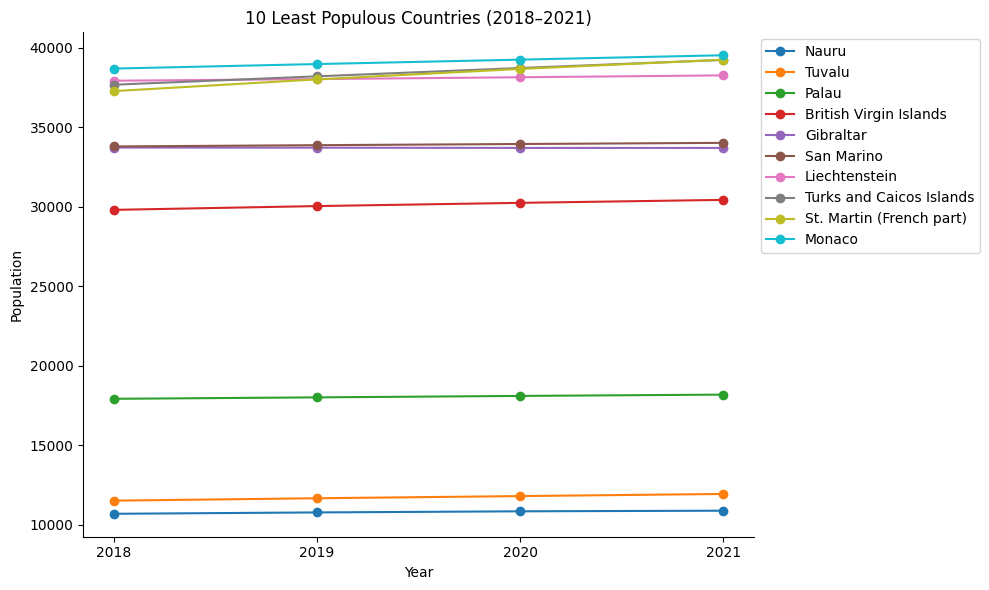

In [49]:
# Get the 10 smallest in 2021  
least10 = df_pop.nsmallest(10, '2021').set_index('Country Name')  
  
# Display their populations 2018–2021  
print(least10)  
  
# Plot them over 2018–2021  
years = [2018, 2019, 2020, 2021]  
plt.figure(figsize=(10, 6))  
for country in least10.index:  
    pops = least10.loc[country, ['2018','2019','2020','2021']].values  
    plt.plot(years, pops, marker='o', label=country)  

plt.title('10 Least Populous Countries (2018–2021)')  
plt.xlabel('Year')  
plt.ylabel('Population')  
plt.xticks(years)  
plt.legend(loc='upper left', bbox_to_anchor=(1,1))  
sns.despine()  
plt.tight_layout()  
plt.show()

#### What, if any, impact does Population have on Air Quality?

In [50]:
# Reshaping and Merging datasets for plot

# Melt population: year columns are currently strings of years
pop_long = df_pop.melt(id_vars=['Country Name'], var_name='Year', value_name='Population')

# Melt air quality
air_long = df_air.melt(id_vars=['Country/Region'], var_name='Year', value_name='AirQuality')

# Rename for consistency between datasets
pop_long.rename(columns={'Country Name': 'Country'}, inplace=True)
air_long.rename(columns={'Country/Region': 'Country'}, inplace=True)

In [51]:
# Make sure Year is numeric
pop_long['Year'] = pop_long['Year'].astype(int)
air_long['Year'] = air_long['Year'].astype(int)

In [52]:
# Merge on Country and Year
merged = pd.merge(pop_long, air_long, on=['Country', 'Year'], how='inner')

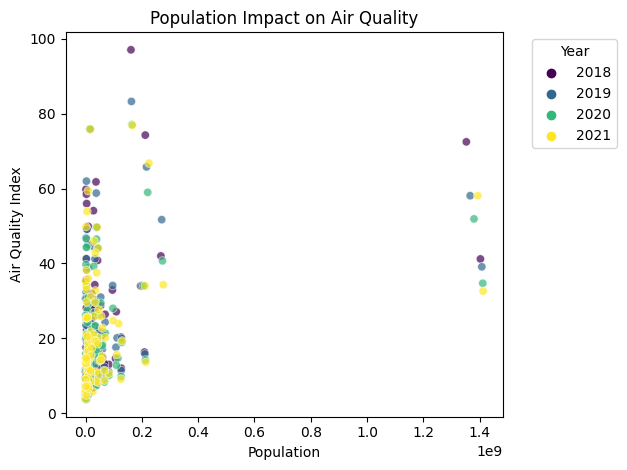

In [53]:
# Plot scatterplot of Population vs AirQuality colored by Year
g = sns.scatterplot(data=merged, x='Population', y='AirQuality', hue='Year', palette='viridis', alpha=0.7)
plt.title('Population Impact on Air Quality')
plt.xlabel('Population')
plt.ylabel('Air Quality Index')
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

The scatter plot confirms my hypothesis - Overall, countries with larger populations tend to exhibit higher Air Quality Index values (i.e., poorer air quality). The points slope upward from left to right, suggesting population size is a driver (or at least a strong indicator) of air pollution levels.

We also see that even if population remains similar, air quality has worsened from 2018 through 2021.

The outlier, a handful of high-population countries, the top 10% by population, show especially large jumps in their AQ index, indicating rapid degradation.

Together, the plot suggests that while population size places increasing pressure on air pollution, policy interventions or technological improvements can moderate the effects, or if absent of any intervention, exacerbate those trends over time.

### **5.2:** Reflection
If I had more time to complete the project, I would further like to delve into the mitigation efforts of the outlier top 10% population countries that have a rapid degradation of air pollution levels. I would study their individual effects on air quality with communities in a range of population sizes.